In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('../dataset/clustering.csv')
data.head()

,Unnamed: 0,PCA_1,PCA_2,PCA_3
0,0,0.180723,0.033100,0.809854
1,1,0.182667,0.059729,0.798746
2,2,0.239272,0.647740,0.605161
3,3,0.170602,0.080760,0.815757
4,4,0.179790,0.064229,0.836113


In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.describe()

,PCA_1,PCA_2,PCA_3
count,65366.000000,65366.000000,65366.000000
mean,0.130654,0.137652,0.876433
std,0.066716,0.115330,0.074218
min,0.000000,0.000000,0.000000
25%,0.104601,0.064469,0.832552
50%,0.121249,0.090376,0.897683
75%,0.163324,0.190206,0.922491
max,1.000000,1.000000,1.000000


In [4]:
data = data.sample(n=10000, random_state=42)

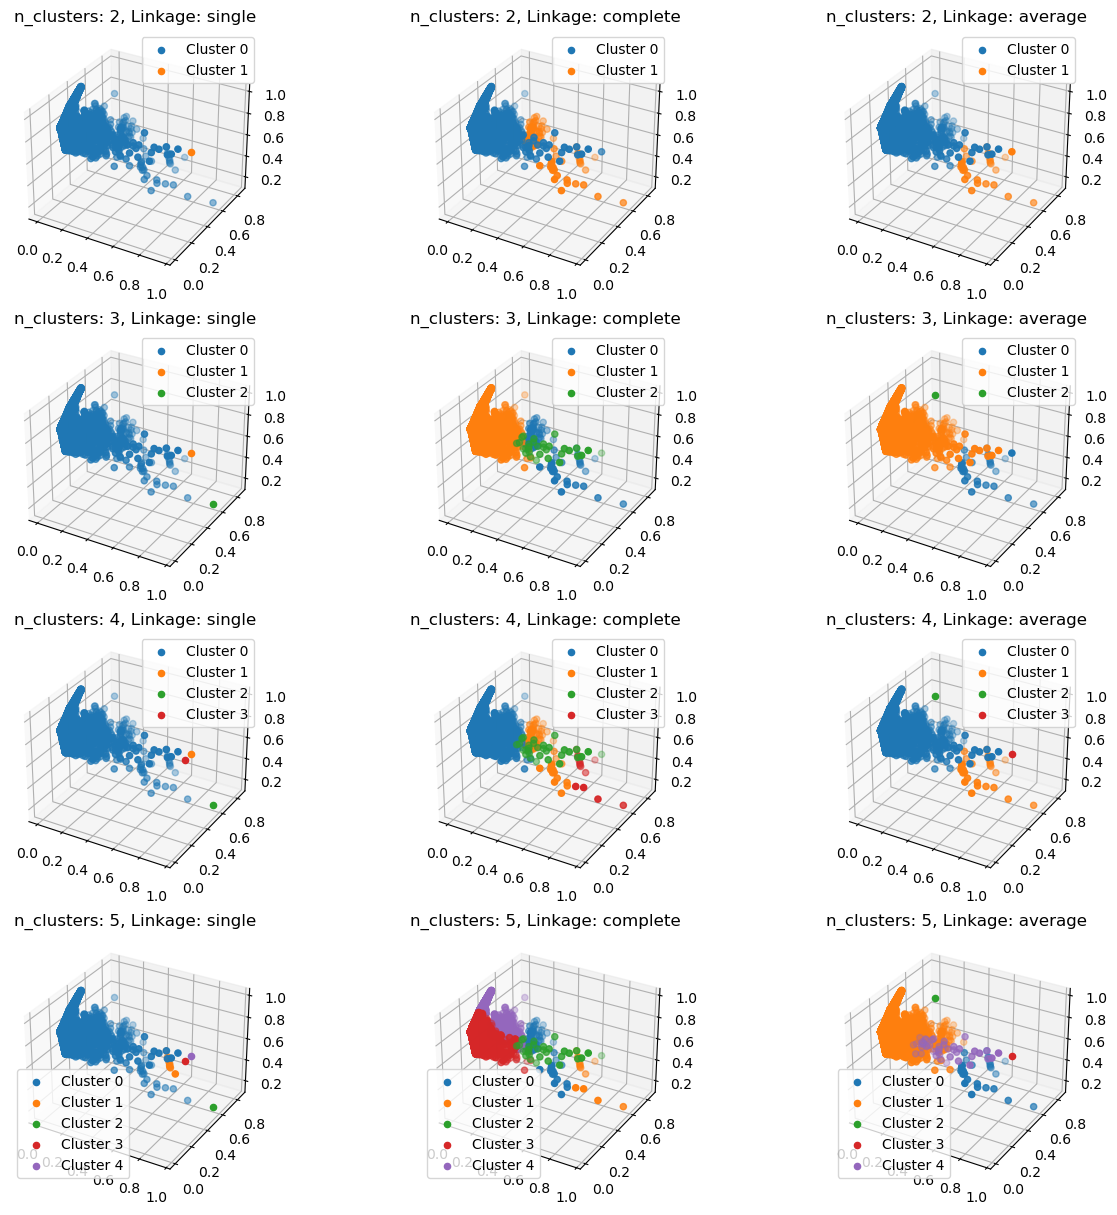

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = [[],[],[]]

n_clusters_list = range(2,6)
linkages = ['single', 'complete', 'average']
fig = plt.figure(figsize=(15, 15))

for n_clusters in n_clusters_list:
    for idx, linkage in enumerate(linkages):
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        model.fit(data)

        ax = fig.add_subplot(len(n_clusters_list), len(linkages), (n_clusters_list.index(n_clusters) * len(linkages)) + idx + 1, projection='3d')

        for cluster_label in range(n_clusters):
            cluster = data[model.labels_ == cluster_label]
            ax.scatter(cluster['PCA_1'], cluster['PCA_2'], cluster['PCA_3'], label=f'Cluster {cluster_label}')
            
        ax.set_title(f'n_clusters: {n_clusters}, Linkage: {linkage}')
        ax.legend()
        silhouette_scores[idx].append(silhouette_score(data, model.labels_))

plt.show()

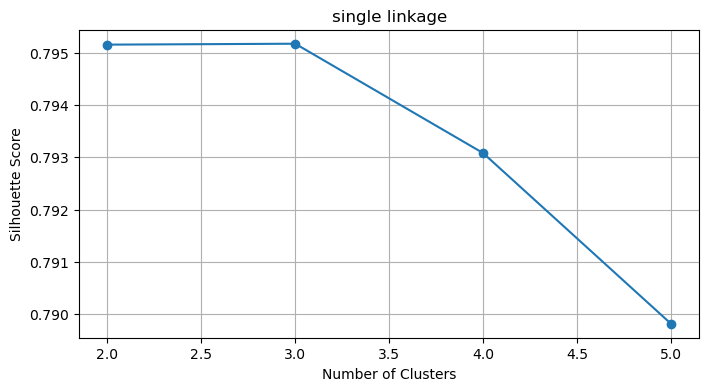

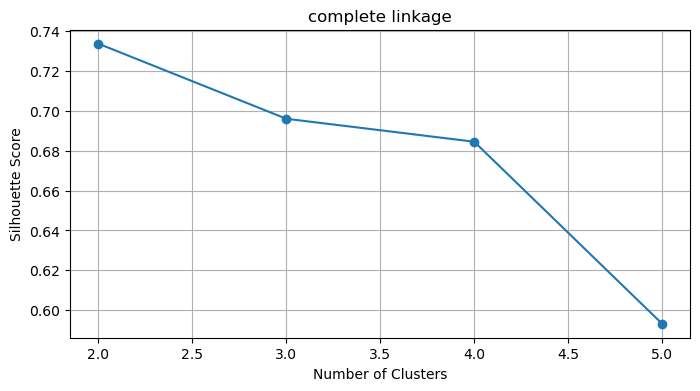

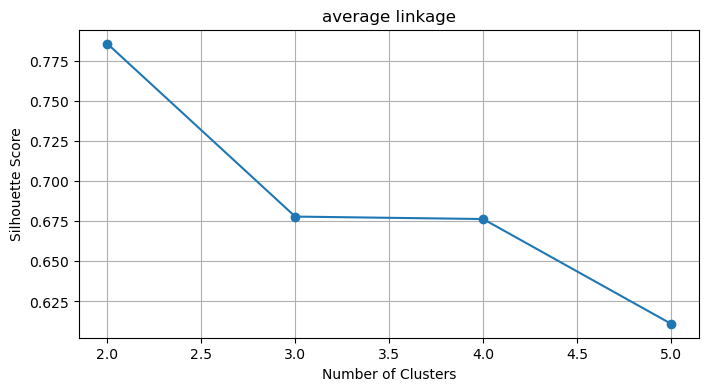

In [6]:
for idx,linkage in enumerate(linkages):
    plt.figure(figsize=(8, 4))
    plt.plot(range(2,6), silhouette_scores[idx], marker='o', linestyle='-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'{linkage} linkage')
    plt.grid(True)
    plt.show()

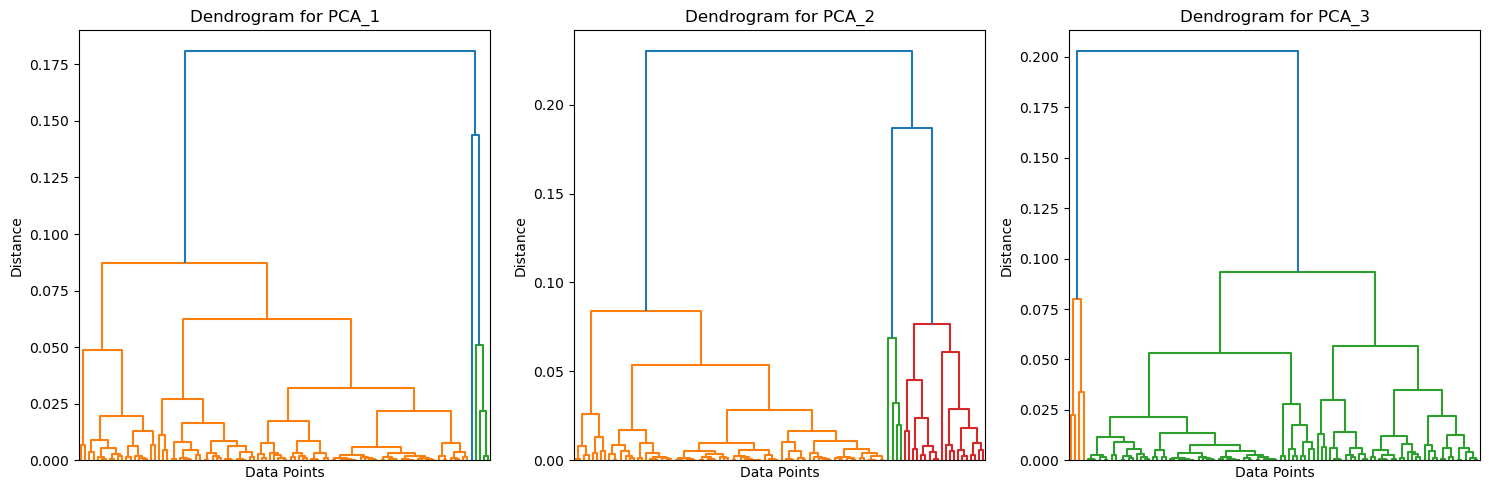

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

attributes = ['PCA_1', 'PCA_2', 'PCA_3']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, attr in enumerate(attributes):
    sampled_data = data.sample(n=100, random_state=42)
    Z = linkage(sampled_data[attr].values.reshape(-1, 1), method='average')
    
    ax = axs[i]
    dendrogram(Z, leaf_rotation=90, no_labels=True, ax=ax)
    ax.set_title(f'Dendrogram for {attr}')
    ax.set_xlabel('Data Points')
    ax.set_ylabel('Distance')

plt.tight_layout()
plt.show()